In [11]:
#|default_exp app

# 1. Load model
We will load a model (pickle file) from storage

In [2]:
#|export
from fastai.vision.all import *

pet_recognizer = load_learner('./pet_recognizer.pkl')

/Users/thislexic/Desktop/me-projects/ai-cookbook/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


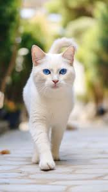

In [3]:
im = PILImage.create("./siamese.jpeg")
im.thumbnail((192, 192))
im

In [4]:
pet_recognizer.predict(im)

('cat',
 tensor(0),
 tensor([9.7223e-01, 1.4208e-02, 5.1303e-05, 3.6363e-03, 9.8719e-03]))

# 2. Gradio interface for the model
This is just a local Gradio interface but this is the stepping stone to deploying it on Hugging Face with a Gradio interface.

In [5]:
#|export
categories = ("cat", "chihuahua", "chowchow", "pitbull", "shih tzu") # ordered based on file order (alphabetical)

def classify_img(img):
    pred, idx, probs = pet_recognizer.predict(img)
    return dict(zip(categories, map(float, probs)))

In [6]:
classify_img(im)

# this is the format that Gradio expects. A dict of all possible categories with their probabilities

{'cat': 0.9722321033477783,
 'chihuahua': 0.014208417385816574,
 'chowchow': 5.130343197379261e-05,
 'pitbull': 0.003636307315900922,
 'shih tzu': 0.009871851652860641}

In [7]:
#|export
# Let's test out the Gradio interface

import gradio as gr

image = gr.Image()
label = gr.Label()

examples = ["siamese.jpeg"]

intf = gr.Interface(fn=classify_img, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# 3. Export Gradio app

In [12]:
import nbdev

nbdev.export.nb_export('load_model.ipynb')